In this experiment we increase the number of traits per agent to be $K=10$. In the first part we test the effect of adding a similarity threshold with this increased number of traits. Next, we show that when $S=0.5$, $K=10$, that a minority fraction of 10%.

Just realizing I forgot the minority fraction should be set to 0.1 for the second experiment described above, re-running now while I draft the analysis for the first experiment.

In [3]:
dfp5 = pd.read_csv('data/minority-similarity/similarity/0.5/full.csv')

In [4]:
dfp5.head()

,disliking,homophily,initial_prop_churlish,initial_prop_covert,prop_churlish,prop_covert,timestep,trial_idx
0,0.05,0.0,0.5,0.5,0.50,0.50,0,1759425396
1,0.05,0.0,0.5,0.5,0.47,0.51,1,1759425396
2,0.05,0.0,0.5,0.5,0.45,0.51,2,1759425396
3,0.05,0.0,0.5,0.5,0.44,0.53,3,1759425396
4,0.05,0.0,0.5,0.5,0.46,0.55,4,1759425396


In [8]:
similarities = np.arange(0.1, 1.01, 0.1)
sim_strs = [f'{s:1.1f}' for s in similarities]
sim_strs

['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

In [24]:
path_f = lambda sstr: f'data/minority-similarity/{sstr}/full.csv'
# dfs = {}
dfs = []
for sstr in sim_strs:
    dfs.append(pd.read_csv(path_f(sstr)))
#     dfs.update({sstr: pd.read_csv(path_f(sstr))})


In [25]:
from id_signaling.figures import similarity_threshold

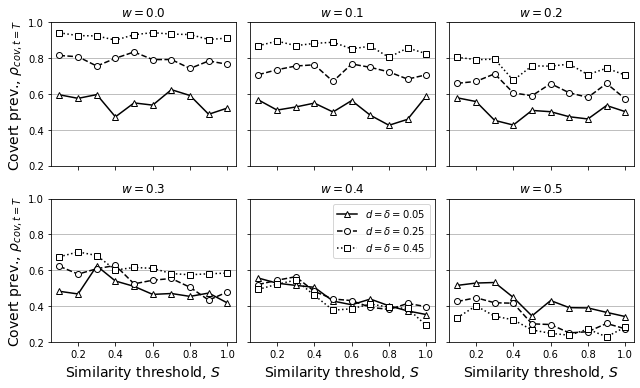

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5.5), 
                         sharex=True,sharey=True)
axes = axes.flatten()
for idx, h in enumerate(np.arange(0, 0.6, 0.1)):
    if idx == 4:
        legend = True
    else:
        legend = False
    if idx not in [0, 3]:
        ylabel = False
    else:
        ylabel = True
    if idx < 3:
        xlabel = False
    else:
        xlabel = True
    
    similarity_threshold(dfs, homophily=h, ax=axes[idx], 
                         legend=legend, xlabel=xlabel, ylabel=ylabel)

plt.savefig('reports/Figures/similarity_threshold_matrix.pdf')

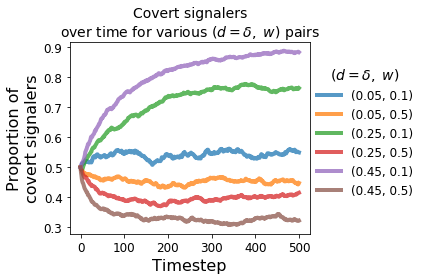

In [79]:
from id_signaling.figures import plot_evolution


plot_evolution(samp, experiment='disliking', exp_param_vals=[0.05, 0.25, 0.45],
               homophily_vals=[0.1, 0.3, 0.5])



## Minority robustness check

This should go in the minority notebook, but this is here because I was doing both as additional analyses.


In [81]:
from id_signaling.figures import minority_diff_heatmap

In [82]:
df = pd.read_csv('data/minority-similarity/minority/full.csv')
df.head()

,disliking,homophily,initial_prop_churlish,initial_prop_covert,minority_trait_frac,prop_churlish,prop_churlish_majority,prop_churlish_minority,prop_covert,prop_covert_majority,prop_covert_minority,timestep,trial_idx
0,0.05,0.0,0.5,0.5,0.1,0.50,0.522222,0.3,0.50,0.455556,0.9,0,3178158386
1,0.05,0.0,0.5,0.5,0.1,0.50,0.522222,0.3,0.50,0.455556,0.9,1,3178158386
2,0.05,0.0,0.5,0.5,0.1,0.48,0.511111,0.2,0.48,0.433333,0.9,2,3178158386
3,0.05,0.0,0.5,0.5,0.1,0.50,0.522222,0.3,0.51,0.466667,0.9,3,3178158386
4,0.05,0.0,0.5,0.5,0.1,0.50,0.522222,0.3,0.48,0.433333,0.9,4,3178158386


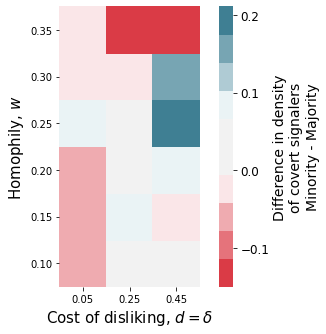

In [83]:
minority_diff_heatmap(df)